# Descripción del problema

## Estadísticos de orden

El estadístico de orden corresponde al $k$-ésimo elemento de una secuencia de "n" elementos en orden ascendente. Por ejemplo el primer estadístico de orden correspondería al menor elemento en la secuencia.

Se nos pide implementar un algoritmo que encuentre el $k$-ésimo estadístico de orden utilizando particiones.

## Descripción del algoritmo

El algoritmo select a implementar basa sus decisiones en la elección de un pivote

### Elección del pivote

La elección del pivote consiste en dividir el arreglo original en partitiones de 5 elementos máximo. Posteriormente a cada subarreglo se le calcula la mediana. Para esto aplicamos insertionSort en cada uno de los subarreglos.

Utilizando la misma función pivot selection obtenemos la media de medianas, la cual será utilizada en el método partition

---

Una vez elegido el pivote realizamos la partición guiándonos por el mismo.

Si la posición del pivote es mayor al estadístico de orden que buscamos, esto
significa que el estadístico se encuentra en el subarrreglo izquierdo de la partición. Por lo que llamamos al algoritmo recursivamente para que encuentre el estadístico.

Si la posición del pivote es menor al estadístico esto significa que el valor a buscar se encuentra en el subarreglo izquierdo. Por lo que llamamos recursivamente al algoritmo para encontra el estadístico de orden.

Se repite este proceso hasta que el estadístico de orden coincida con la mediana

## Ejemplo del algoritmo


Sea $A$ un arreglo con la secuencia $[3,2,9,0,7,5,4,8,6,1]$

Primero dividimos el arreglo en grupos de 5 elementos.
Luego $L = [3,2,9,0,7]$ y $R = [5,4,8,6,1]$.

Para cada uno de los subarreglos aplicamos insertion Sort.

$L' = [0,2,3,7,9]$ y $R' = [1,4,5,6,8]$.

Utilizamos el mismo algoritmo a ser implementado de manera recursiva para obtener la media de cada subarreglo.

$$m = [3,5]$$

Utilizamos el $3$ como nuestro pivote.


Utilizando el pivote obtenido anteriormente, de manera similar al algoritmo partition de quicksort. Separamos el arreglo en dos mitades dado un pivote. Dejando los elementos menores que este a la izquierda y los mayores que este a la derecha.


En este caso estamos buscando el menor elemento del arreglo. Notemos que la posición del pivote es $4$ (contando desde 1) y que el estadístico de orden a buscar es el primero. Por lo que llamamos de manera recursiva al subarreglo izquierdo $[2,0,1]$.

Como este subarreglo tiene menos de cinco elementos, solamente aplicamos insertion sort una vez para obtener la mediana. Luego la mediana en el arreglo de medianas será el único elemento $(0)$.

## Implementación del algoritmo

In [1]:
def swap(a,x,y):
    a[x], a[y] = a[y], a[x]


def ins_sort(a, do_count = False):
    if do_count: global count;
    for i in range(1, len(a)):
        k = a[i]
        j = i-1
        while j >=0 and k < a[j]:
                a[j+1] = a[j]
                j -= 1
                if do_count: count +=1
        a[j+1] = k
    return a


"""
Parametros:
------------
a: Arreglo a particionar
pivot: pivote para particionar
v: Variable verbose;
l: Nivel de identación para imprimir. Aumentará recursivamente;
"""         
def partition(a, pivot, v = False, l = 0): 
    if v: print(l*4*" " + " Inicio partition");
    i = 0;          # Itera de izq. a der.
    j = len(a) - 1  # Itera de der. a izq.
    while i < j:        # Mientras no se crucen
        # Recorrer con el i hasta que a[i] >= pivot
        while i < len(a) and a[i] < pivot: i+=1;
        # Recorrer con el j hasta que a[i] < pivot
        while j > 0 and a[j] >= pivot: j-=1;
        if i < j:   # Si se cruzaron
            if v: print(l*4*" " + f"Se cambia el {a[i]} con el {a[j]}")
            if v: print(l*4*" " ,a)
            swap(a, i, j);  # swap
    if a[i] > pivot:# Si el i termina pasado el pivote
        swap(a,i, a.index(pivot)); #swap
    if v: print(l*4*" " + "Fin partition");
    return i
"""
Partition Select.

Devuelve un pivote que corresponde a la media de medianas de fracciones de a lo más
cinco elementos en un arreglo

Parametros:
------------
k: Estadístico de orden
v: Variable verbose;
l: Nivel de identación para imprimir. Aumentará recursivamente;
"""         

# TODO : Incorporar un contador para el número de comparaciones que realiza la función.
def ps(a, v = False, l = 0, do_count = False):
    # Caso base
    if (len(a) == 1): return a[0]
    """
    i: Cuenta los elementos añadidos al chunk
    j: Índice del chunk actual
    arrs: Arreglo con los chunks
    ms: Arreglo de medianas
    """
    i=0;j=0;arrs=[[]];ms=[]
    # O(n)
    for num in a: # Para cada número
        if i == 5:  # Si el chunk está lleno
            if v: print( l*4*" " + "Se añade un chunk.")
            i = 0; # Resetear contador de elementos
            # Obtener la mediana con insertion Sort
            ins_sort(arrs[j], do_count = do_count) # O(1)
            if v: print(l*4*" " + str(arrs))
            n = len(arrs[j]) 
            m = arrs[j][(n+1)//2 - 1] # O(1)
            ms.append(m)
            if v: print(l*4*" " + f"Su media es: {m}");
            # Siguiente arreglo
            j+=1; 
            arrs.append([]);
        arrs[j].append(num);
        i+=1
    # Procesar el arreglo que no se llenó
    if v: print( l*4*" " + "Se añade un chunk.")
    ins_sort(arrs[j], do_count = True)
    if v: print(l*4*" " + str(arrs))
    n = len(arrs[j])
    m = arrs[j][(n+1)//2 - 1]
    ms.append(m)
    if v: print(l*4*" " + f"Su media es: {m}");
    return(ps(ms, do_count=do_count))



"""
Select

Retorna el estadístico de orden

Parametros:
------------
a: Arreglo de entrada
k: Estadístico de orden
v: Variable verbose;
l: Nivel de identación para imprimir. Aumentará recursivamente;
"""

def p(a, k, v = False, l = 0, do_count = False):
    if v: print(l*4*" " + "Arreglo de entrada:", a);
    if v: print(l*4*" " + "Buscamos la mediana de medianas:", a);
    pivote = ps(a, l = l + 1, v = v, do_count=do_count); # Obtener el *valor* del pivote
    if v: print(l*4*" " + "El pivote es" ,str(pivote) +  ",");
    pos_pivote = partition(a, pivote, l = l + 1, v = v); # Particionar y obtener su posición
    if v: print(l*4*" " + "pivote termina en la posición" ,pos_pivote)
    # Comparar la posición del pivote con el estadístico de orden
    if pos_pivote == k - 1: 
        if v: print("El pivote coincide con el estadístico de orden.")
        return pivote;
    if k-1 < pos_pivote: return p(a[:pos_pivote], k, l = l+1, v = v, do_count=do_count);
    return p(a[pos_pivote+1:], k - pos_pivote - 1, l = l+1, v = v, do_count = do_count);

## Ejemplo verbose

In [2]:
#p([1.23, 0.5, 2.6, 78,342, 78,345, -0.00001, 7.21, 45, 420, 12.1412, -11.13, 6.50, 15.75, 1.1], 6, v = True)
p([3,2,9,0,7,5,4,8,6,1], 1, v = True)

Arreglo de entrada: [3, 2, 9, 0, 7, 5, 4, 8, 6, 1]
Buscamos la mediana de medianas: [3, 2, 9, 0, 7, 5, 4, 8, 6, 1]
    Se añade un chunk.
    [[0, 2, 3, 7, 9]]
    Su media es: 3
    Se añade un chunk.


NameError: name 'count' is not defined

## Correctitud del algoritmo Select

**Teorema:** $P(n):$ El algoritmo Select encuentra correctamente el estadístico de orden $k$.

Se particiona un arreglo $A$ de $n$ elementos alrededor de un pivote $p$ equivalente a la
mediana de medianas. Por la prueba de correctitud de la subrutina Partition, se sabe que el pivote $p$ acaba en la posición correcta.

**Caso base:** La posición de la mediana de medianas corresponde al estadístico de orden $k$.

**Paso inductivo:** Fijar $m\geq 5$. Para un arreglo de entrada de longitud $n$.

Se demuestra que si $P(m)$ se mantiene para todo $m<n$, luego $P(n)$ es correcto.

Por hipótesis inductiva, el algoritmo select obtiene correctamente el estadístico de orden de los dos posibles subarreglos de manera recursiva.

En el caso de la derecha el estadístico de orden a obtener de manera recursiva cambia (el estadístico de orden en el subarreglo corresponde al estadístico de orden del arreglo originar restándole la cantidad de elementos a la izquierda del pivote).

Luego de las llamadas recursivas el estadístico de orden ha sido obtenido correctamente.

## Análisis del tiempo de ejecución del algoritmo select

El algoritmo select se apoya en múltiples subrutinas tales como InsertionSort, Partition  y PivotSelection. 

El algoritmo InsertionSort es utilizado exclusivamente en subarreglos de a lo sumo 5 elementos. Se sabe que InsertionSort realiza $n^2$ comparaciones e intercambios en su peor caso. Es posible concluir que se realizarán a lo más 25 comparaciones e intercambios. Por lo que la subrutina InsertionSort está acotada por un valor constante, vale decir $O(1)$.

Para cada llamada al algoritmo Partition recorremos el arreglo de manera lineal. Por lo que su complejidad es $O(n)$.

Pivot Selection es una función recursiva. Se itera por los números del arreglo para añadirlos a los subarreglos. Esto tiene una complejidad lineal $O(n)$. Esta subrutina se puede encontrar en otras implementaciones como 
"chunked".

Posteriormente se obtiene recursivamente la mediana de medianas. Concretamente el arreglo de medianas posee $n/5$ elementos. Por lo que el tiempo de ejecución de la llamada recursiva será denotado como $T(n/5)$.

Una vez realizada la partición, en el peor caso se presentan dos posibles tiempos. El primero es la recursión a la partición izquierda, cuyo tiempo sería $T(3n/10)$. El segundo es el de la recursión a la partición derecha y el que será utilizado para analizar el tiempo de ejecución, el tiempo de esta mitad sería $T(7n/10)$.

De lo anterior se deduce que la función de recurrencia $T(n)$ para el algoritmo select está definida por

$$
T(n) \leq O(n) + T(n/5) + T(7n/10)
$$

## Prueba por sustitución

Teorema: Asumiendo que $T(n) \leq cn$ para alguna constante $c$.

$$
T(n) \leq O(n) + T(n/5) + T(7n/10)
$$

$$
T(n) \leq d \cdot n + c \cdot n/5 + c \cdot 7n/10
$$

$$
c\cdot 10n/10 \leq d \cdot n + c \cdot 2 \cdot n/10 + c \cdot 7n/10
$$

$$
c\cdot 10n/10 - c \cdot 2 \cdot n/10 - c \cdot 7n/10 \leq d \cdot n
$$

$$
c\cdot n/10 \leq d \cdot n
$$

$$
c/10 \leq d
$$

Es posible interpretar que la constante de ejecución $c$ es 10 veces más grande que la constante de ejecución d. Lo que implica que el tiempo de ejecución de la subrutina partition es menor que la de la totalidad del algoritmo select, una tautología.

### Experimentos

### Comparaciones peor caso

In [ ]:
from matplotlib import pyplot as plt
from math import ceil
import random
samples = 1000
r = range(1, samples)

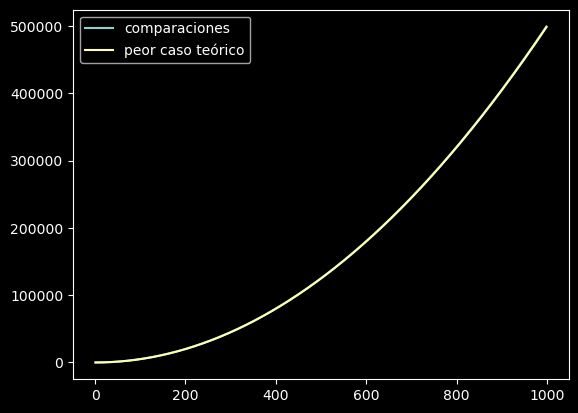

In [ ]:
x = []; y = [];

for i in r:
    a = [n for n in range(i,-1, -1)]   
    count = 0
    ins_sort(a, do_count=True)
    #print(a, count)
    y.append(count)
    x.append(i)
plt.plot(x,y)
plt.plot(x,[0.5*(num*(num - 1)) for num in x])
plt.legend(["comparaciones", "peor caso teórico"])
plt.show()


La cantidad de comparaciones para un ordenamiento por medio de insertion sort es a lo sumo $c = n(n-1)/2$.

Se sabe que el algoritmo partition select solo realiza insertion sort para arreglos de un tamaño máximo de 5 elementos. Por lo que por cada subarreglo se realizarán a lo más 10 comparaciones.

La cantidad de subarreglos es calculable con $ s = \text{ceil}(n/5)$.

El producto entre estos dos valores es $10s$ corresponde al número de comparaciones al obtener las medianas.

Para obtener la mediana de medianas se llama a la función de manera recursiva con un problema de tamaño $s$

$$
C(n) = 10\cdot(n/5) + C(n/5)
$$

$$
C(n) = 2\cdot n + C(n/5)
$$

Caso base: $n\leq5$

$$
C(5) = 10 + C(1)
$$

Sabemos que para un caso base $C(1)$ Pivot Selection no realiza comparaciones y retorna la mediana inmediatamente. Por lo que

$$
C(5) = 10
$$

In [ ]:
def c(n):
    if n == 1: return 0;
    if n <= 5: return n*(n-1)//2
    return 10*ceil(n/5) + c(ceil(n/5))
#   return 2*n + c(n/5)
print(c(8))

21


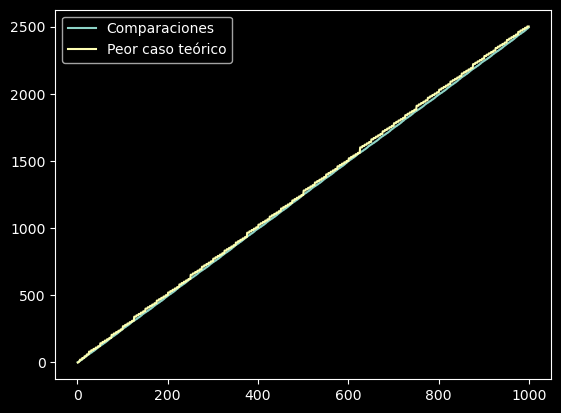

In [ ]:
samples =1000
x = []
y = []
y2 = []
for i in range(1, samples):
    x.append(i)
    count = 0;
#    a =random.sample(range(i), i)
    a = list(range(i, -1, -1))
    p(a,1, v = False, do_count = True) 
    y.append(count)
    y2.append(c(i))
plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["Comparaciones", "Peor caso teórico"])

### Comparación mejor caso

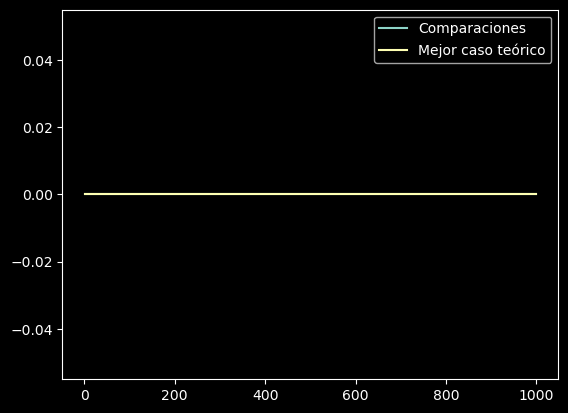

In [ ]:
samples =1000
x = []
y = []
y2 = []
for i in range(1, samples):
    x.append(i)
    count = 0;
#    a =random.sample(range(i), i)
    a = list(range(i))
    p(a, 1, v = False, do_count = True) 
    y.append(count)
    y2.append(c(i))
plt.plot(x,y)
plt.plot(x,[0 for n in x])
plt.legend(["Comparaciones", "Mejor caso teórico"])

### Comparación mejor y peor caso con arreglo aleatorio


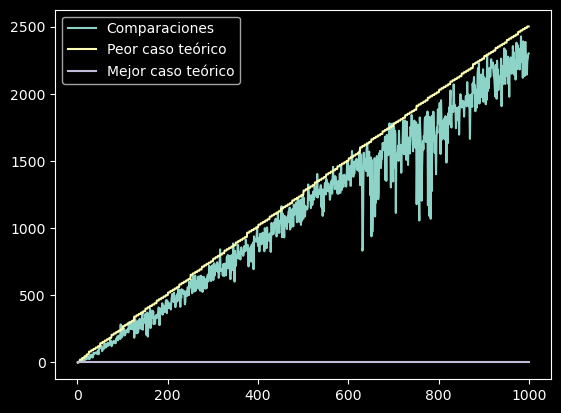

In [ ]:

samples =1000
x = []
y = []
y2 = []
for i in range(1, samples):
    x.append(i)
    count = 0;
    a =random.sample(range(i), i)
    p(a, 1, v = False, do_count = True) 
    y.append(count)
    y2.append(c(i))
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,[0 for n in x])
plt.legend(["Comparaciones", "Peor caso teórico", "Mejor caso teórico"])

Se observa que el algoritmo se comporta de manera esperada. Se mantiene bajo la recta dada por la función de comparaciones $C(n)$ que representa el peor caso y sobre la linea $y = 0$ (mejor caso). La función recursiva calcula correctamente la cantidad de comparaciones. 

Es posible obtener un aproximado de la función recursiva utilizando una función generadora $F(z) = \sum_{n=0}^\infty f(n)z^n$ y el método Ansatz. Sin embargo esto excede mis matemáticas.

La función select se mantiene usualmente cerca del peor caso para arreglos aleatorios. Su constante de ejecución $c$ es más elevada que la del algoritmo Randomized select 

### Comparación con randomized-select

In [ ]:
from random import shuffle


def _partition(arr, lo, hi, pivot):
    p = arr[pivot]
    arr[hi - 1], arr[pivot] = arr[pivot], arr[hi - 1]
    i = lo - 1
    for j in range(lo, hi, 1):
        if arr[j] <= p:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    return i


def rs(arr, lo, hi, spos):
    assert lo <= spos < hi
    shuffle(arr)  # shuffling is the randomization.
    while True:
        pos = _partition(arr, lo, hi, lo)
        if pos == spos:
            return arr[pos]
        elif pos < spos:
            lo = pos + 1
        else:
            hi = pos

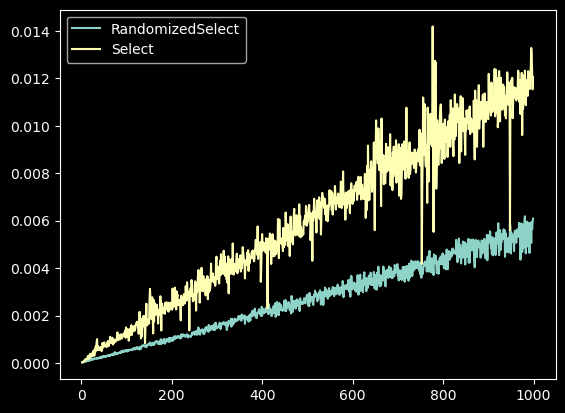

In [ ]:
from timeit import repeat
samples = 1000
x = []
y1 = []
y2 = []
for i in range(2, samples):
    a = random.sample(range(1,i+1), i) 
    r = random.randint(1,i-1);
    # print(a, r)
    t1 = repeat(setup = "from __main__ import rs; import random", stmt = f"rs({a}, 0, len({a}), {r})", repeat = 1, number = 10)
    t2 = repeat(setup = "from __main__ import p", stmt = f"p({a}, {r})", repeat = 1, number = 10)
    x.append(i)
    y1.append(t1)
    y2.append(t2)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["RandomizedSelect", "Select"])

Randomized select presenta un mejor comportamiento que select en la mayoría de casos generales. Como es de esperarse ambos presentan un tiempo de ejecución lineal.

Los algoritmos se diferencian por su variación en la elección del pivote. Randomized es mucho más eficiente ya que se ahorra tiempo al no tener que calcular una mediana de medianas. Un valor aleatorio presenta tan buenos resultados como uno premeditado.

Una de la ventajas de randomized select es que, debido a su naturaleza, ningún arreglo en particular gatillará el peor tiempo $n^2$. Haciéndolo una perfecta opción si se quiere evitar este caso.